## Goal

Expedia has provided you logs of customer behavior. These include what customers searched for, how they interacted with search results (click/book), whether or not the search result was a travel package. The data in this competition is a random selection from Expedia and is not representative of the overall statistics.

Expedia is interested in predicting which hotel group a user is going to book. Expedia has in-house algorithms to form hotel clusters, where similar hotels for a search (based on historical price, customer star ratings, geographical locations relative to city center, etc) are grouped together. These hotel clusters serve as good identifiers to which types of hotels people are going to book, while avoiding outliers such as new hotels that don't have historical data.

Your goal of this competition is to predict the booking outcome (hotel cluster) for a user event, based on their search and other attributes associated with that user event.

The train and test datasets are split based on time: training data from 2013 and 2014, while test data are from 2015. The public/private leaderboard data are split base on time as well. Training data includes all the users in the logs, including both click events and booking events. Test data only includes booking events. 

destinations.csv data consists of features extracted from hotel reviews text. 

Note that some srch_destination_id's in the train/test files don't exist in the destinations.csv file. This is because some hotels are new and don't have enough features in the latent space. Your algorithm should be able to handle this missing information.

## Data Dictionary

|Column name|Description|Data type|
|-----------|-----------|---------|
|date_time|Timestamp|string|
|site_name|ID of the Expedia point of sale(i.e.Expedia.com,Expedia.co.uk, Expedia.co.jp, ...)|int|
|posa_continent|ID of continent associated with site_name|int|
|user_location_country|The ID of the country the customer is located|int|
|user_location_region|The ID of the region the customer is located|int|
|user_location_city|The ID of the city the customer is located	|int|
|orig_destination_distance|Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated|float|
|user_id|ID of user|int|
|is_mobile|1 when a user connected from a mobile device, 0 otherwise|int|
|is_package|1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise|int|
|channel|ID of a marketing channel|int|
|srch_ci|Checkin date|string|
|srch_co|Checkout date|string|
|srch_adults_cnt|The number of adults specified in the hotel room|int|
|srch_children_cnt|The number of (extra occupancy) children specified in the hotel room|int|
|srch_rm_cnt|The number of hotel rooms specified in the search	|int|
|srch_destination_id|ID of the destination where the hotel search was performed|int|
|srch_destination_type_id|Type of destination|int|
|hotel_continent|Hotel continent|int|
|hotel_country|Hotel country|int|
|hotel_market|Hotel market|int|
|is_booking|1 if a booking, 0 if a click|int|
|cnt|Numer of similar events in the context of the same user session|int|
|hotel_cluster|ID of a hotel cluster|int|

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [15]:
exp = pd.read_csv("../../Datasets/Expedia Data/train.csv")

In [16]:
exp_test = pd.read_csv("../../Datasets/Expedia Data/test.csv")

In [17]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   int64
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
dtypes: float64(1), int64(20), object(3)

In [18]:
exp.shape

(37670293, 24)

In [19]:
exp.head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package      ...        srch_children_cnt  \
0       12          0           1      ...                        0   
1       12          0           1      ...                        0   
2       12          0           0      ...                        0   
3       93          0           0      ...                        0   
4       93          0           0      ...                        0   

  srch_rm_cnt srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0           1                8250                         1           0    3   
1           1                8250                         1           1    1   
2           1                8250                         1           0    1   
3           1               14984                         1           0    1   
4           1               14984                         1           0    1   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                2             50           628              1  
1                2             50           628              1  
2                2             50           628              1  
3                2             50          1457             80  
4                2             50          1457             21  

[5 rows x 24 columns]

In [78]:
vaca = pd.DataFrame(exp.head(200001))

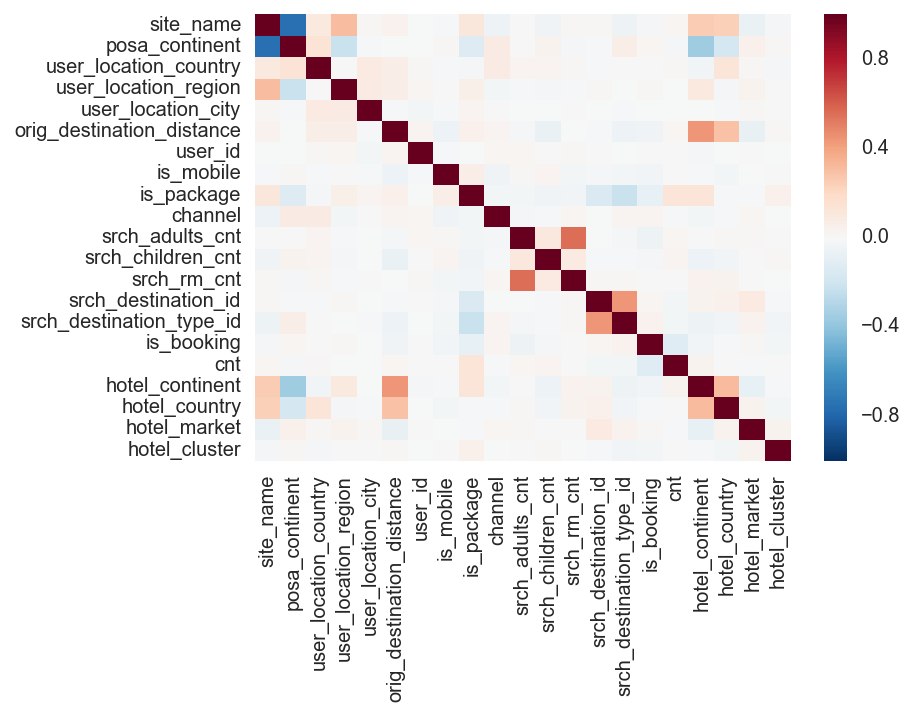

In [79]:
sns.heatmap(vaca.corr())

In [80]:
vaca.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    69638
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        177
srch_co                        177
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [81]:
vaca['date_time'] = pd.to_datetime(vaca['date_time'])
vaca['srch_ci'] = pd.to_datetime(vaca['srch_ci'])
vaca['srch_co'] = pd.to_datetime(vaca['srch_co'])
vaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 24 columns):
date_time                    200001 non-null datetime64[ns]
site_name                    200001 non-null int64
posa_continent               200001 non-null int64
user_location_country        200001 non-null int64
user_location_region         200001 non-null int64
user_location_city           200001 non-null int64
orig_destination_distance    130363 non-null float64
user_id                      200001 non-null int64
is_mobile                    200001 non-null int64
is_package                   200001 non-null int64
channel                      200001 non-null int64
srch_ci                      199824 non-null datetime64[ns]
srch_co                      199824 non-null datetime64[ns]
srch_adults_cnt              200001 non-null int64
srch_children_cnt            200001 non-null int64
srch_rm_cnt                  200001 non-null int64
srch_destination_id          200001 non-null

In [82]:
vaca.head()

date_time  site_name  posa_continent  user_location_country  \
0 2014-08-11 07:46:59          2               3                     66   
1 2014-08-11 08:22:12          2               3                     66   
2 2014-08-11 08:24:33          2               3                     66   
3 2014-08-09 18:05:16          2               3                     66   
4 2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package      ...        srch_children_cnt  \
0       12          0           1      ...                        0   
1       12          0           1      ...                        0   
2       12          0           0      ...                        0   
3       93          0           0      ...                        0   
4       93          0           0      ...                        0   

  srch_rm_cnt srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0           1                8250                         1           0    3   
1           1                8250                         1           1    1   
2           1                8250                         1           0    1   
3           1               14984                         1           0    1   
4           1               14984                         1           0    1   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                2             50           628              1  
1                2             50           628              1  
2                2             50           628              1  
3                2             50          1457             80  
4                2             50          1457             21  

[5 rows x 24 columns]

In [83]:
vaca['user_location_country'].value_counts().head()

66     118749
205     17536
69      15320
3        5957
46       4545
Name: user_location_country, dtype: int64

In [84]:
vaca['user_location_region'].value_counts().head()

174    25200
442     8733
348     8683
220     8295
354     6499
Name: user_location_region, dtype: int64

In [96]:
vaca['user_location_city'].value_counts().head()

48862    3139
24103    2131
5703     2057
4687     1952
2086     1819
Name: user_location_city, dtype: int64

In [85]:
vaca['hotel_continent'].value_counts()

2    107415
6     41285
4     23302
3     23049
0      2861
5      2089
Name: hotel_continent, dtype: int64

In [86]:
vaca['hotel_country'].value_counts().head()

50     98659
8      10195
198     8756
105     7153
70      7044
Name: hotel_country, dtype: int64

In [87]:
vaca['is_booking'].value_counts()

0    183332
1     16669
Name: is_booking, dtype: int64

In [88]:
vaca['is_mobile'].value_counts()

0    172801
1     27200
Name: is_mobile, dtype: int64

In [89]:
vaca['is_package'].value_counts()

0    148936
1     51065
Name: is_package, dtype: int64

In [90]:
vaca['srch_adults_cnt'].value_counts()

2    132673
1     40720
4     11066
3     10301
6      2072
5      1794
0       595
8       446
7       262
9        72
Name: srch_adults_cnt, dtype: int64

In [91]:
vaca['user_id'].value_counts().head(10)

94390     413
123354    405
33803     385
704417    381
70535     361
576212    359
202006    358
72327     341
516445    341
535401    340
Name: user_id, dtype: int64

In [93]:
vaca['srch_destination_type_id'].value_counts()

1    123074
6     44957
3     14007
5     10083
4      6879
8       987
7         8
9         6
Name: srch_destination_type_id, dtype: int64

In [77]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.cross_validation import cross_val_score

In [ ]:
# X = vaca
# Y = vaca.hotel_cluster

# knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# knn.fit(X,Y)

In [ ]:
# scores = cross_val_score(knn, X, Y, cv=10)

In [ ]:
# print scores.mean()